In [2]:
pip install lmfit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, Parameters, report_fit

In [4]:
# constants
g = 9.8
# variables
mass = np.array([0.0499,0.0998,0.1497,0.1996,0.2495,0.2994,0.3493])
sigma_mass = np.array([0.00015,0.00015,0.00015,0.00015,0.00015,0.00015,0.00015])
displacement = np.array([0.0345,0.092,0.152,0.2145,0.272,0.337,0.397])
sigma_displacecment = np.array([0.005,0.005,0.005,0.005,0.005,0.005,0.005])

In [5]:
# calculations
force = mass * g
sigma_force = sigma_mass * g
k = mass * g / displacement
relative_uncertainty = np.sqrt( (sigma_mass/mass)**2 + (sigma_displacecment/displacement)**2 )
sigma_k = k * relative_uncertainty

In [6]:
# fitting to find k
def linear(x,gradient,b):
    return gradient*x + b

model = Model(linear,independent_vars=['x'])
params = Parameters()
params.add('gradient',value=8,vary=True)
params.add('b',value=0.0001,vary=True)


fit = model.fit(force, x= displacement, params=params, weights = 1/sigma_force)
slope = np.round(fit.values['gradient'],3)
intercept = np.round(fit.values['b'],3)
print(fit.values)
print(fit.fit_report())

{'gradient': 8.064787425617814, 'b': 0.22906337842841393}
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 7
    # variables        = 2
    chi-square         = 584.620935
    reduced chi-square = 116.924187
    Akaike info crit   = 34.9753746
    Bayesian info crit = 34.8671949
    R-squared          = -86.3098193
[[Variables]]
    gradient:  8.06478743 +/- 0.04954477 (0.61%) (init = 8)
    b:         0.22906338 +/- 0.01219259 (5.32%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(gradient, b) = -0.8702


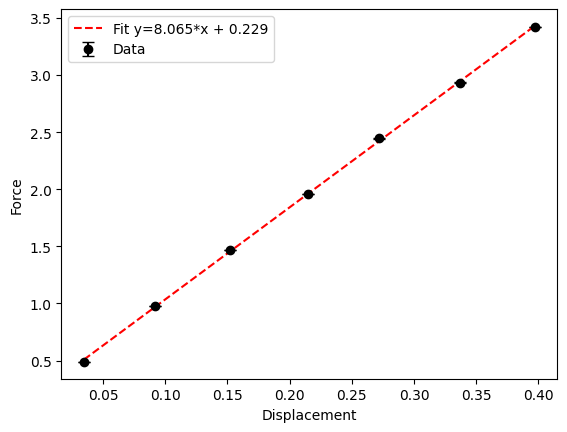

In [7]:
# plotting
plt.errorbar(displacement, force, yerr=sigma_force, fmt='ko', capsize=4, label='Data')
plt.plot(displacement,linear(displacement,slope,intercept),'--r',label='Fit y='+str(slope)+'*x + '+str(intercept))
plt.xlabel('Displacement')
plt.ylabel('Force')
plt.legend()